       coeff
Price    2.0
Open     3.0
Low     -4.0
High    -1.0
             Date  Price   Open   High    Low    Vol. Change %   Pred  \
0    May 04, 2017  28060  28400  28482  28025   0.08K   -1.79%  738.0   
1    May 05, 2017  28184  28136  28382  28135   0.06K    0.44% -146.0   
2    May 08, 2017  28119  28145  28255  28097   7.85K   -0.23%   30.0   
3    May 09, 2017  27981  28125  28192  27947  10.10K   -0.49%  357.0   
4    May 10, 2017  28007  28060  28146  27981   9.28K    0.09%  124.0   
..            ...    ...    ...    ...    ...     ...      ...    ...   
507  Apr 26, 2019  31868  31851  31934  31705   9.67K    0.08%  535.0   
508  Apr 30, 2019  31625  31800  31824  31597   6.44K   -0.76%  438.0   
509  May 01, 2019  31563  31604  31657  31503   1.55K   -0.20%  269.0   
510  May 02, 2019  31203  31420  31425  31160   0.48K   -1.14%  601.0   
511  May 03, 2019  31341  31250  31500  31163   0.08K    0.44%  280.0   

            new  
0    117.570740  
1    295.430176  
2   

C:\Users\aryen\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
No handles with labels found to put in legend.


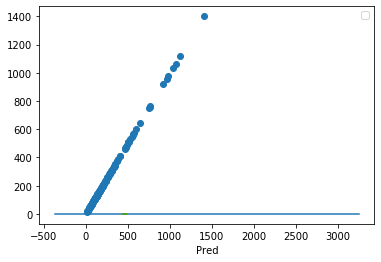

No handles with labels found to put in legend.


alpha:0.0011227429425059775
beta:0.3092025457009067


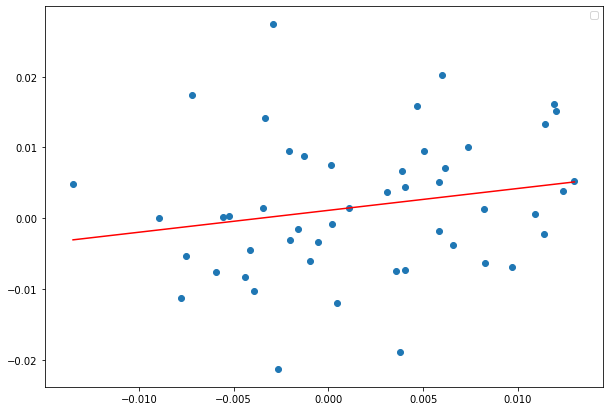

Root Mean Squared Error: 0.010186600468180235


No handles with labels found to put in legend.


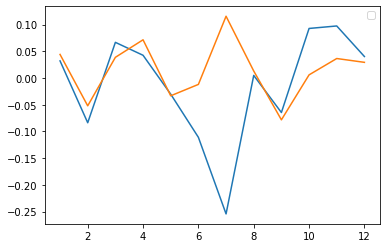

No handles with labels found to put in legend.


alpha:-0.012705486623861163
beta:-0.08731740216780504


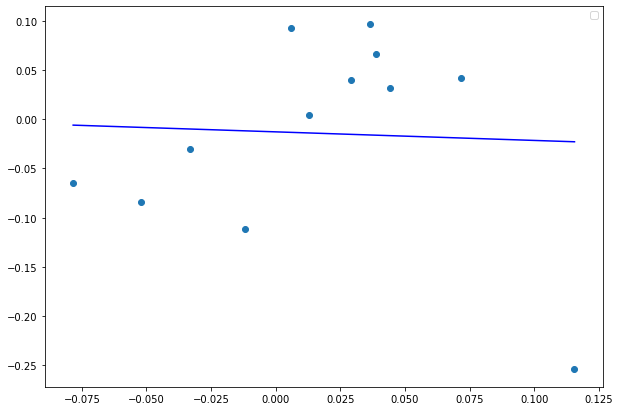

In [8]:
#ex3.1.1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


dataset=pd.read_csv(r'C:\Users\aryen\OneDrive\Desktop\GOLD.csv')
data_with_null=dataset[['Price','Open','Low','High','Pred']]
data_without_null=data_with_null.dropna()
x_train=data_without_null.iloc[:,:4]
y_train=data_without_null.iloc[:,4]

from sklearn.linear_model import LinearRegression
ml1=LinearRegression()
ml1.fit(x_train,y_train)

coefficients=ml1.coef_
coeff_data=pd.DataFrame(coefficients,x_train.columns,columns=['coeff'])
print(coeff_data)

x_test=data_with_null.iloc[:,:4]

dataset['Pred']=pd.DataFrame(ml1.predict(x_test))
data_with_null['Pred'].fillna(dataset['Pred'],inplace=True)
print(dataset)
sns.distplot(dataset['Pred'])

#ex3.1.2
dataset1=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\GOLD.csv")
X=dataset.iloc[:,1:5]
y=dataset.iloc[:,-1]
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)
ml2=LinearRegression()
ml2.fit(X_train,y_train)
y_prednew=ml2.predict(X_test)
plt.scatter(y_test,y_prednew)
from sklearn import metrics
#print(metrics.mean_squared_error(y_test,y_prednew))
#print(np.sqrt(metrics.mean_squared_error(y_test,y_prednew)))
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_prednew)),2)))
print(rms)

#ex3.2.1
dataset2=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Large_Cap\TITAN.csv")
dataset3=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Nifty50\Nifty50.csv")

dataset2['Date']=pd.to_datetime(dataset2['Date'])
dataset3['Date']=pd.to_datetime(dataset3['Date'])
start_date1="13-02-2019"
end_date1="13-05-2019"
mask1=(dataset2['Date']>=start_date1) & (dataset2['Date']<=end_date1)
dataset2=dataset2.loc[mask1]
mask2=(dataset3['Date']>=start_date1) & (dataset3['Date']<=end_date1)
dataset3=dataset3.loc[mask2]
lts=dataset2['Close Price'].head(50)
lt=lts.pct_change()[1:]
niftys=dataset3['Close'].head(50)
nifty=niftys.pct_change()[1:]

plt.plot(lt)
plt.plot(nifty)
plt.legend()
plt.show()
import statsmodels.api as sm
from statsmodels import regression
X=nifty.values
Y=lt.values

def linreg(x,y):
    x=sm.add_constant(x)
    model= regression.linear_model.OLS(y,x).fit()
    x=x[:,1]
    return model.params[0], model.params[1]

alpha,beta=linreg(X,Y)
print("alpha:"+str(alpha))
print("beta:"+str(beta))
X2=np.linspace(X.min(),X.max(),100)
Y_hat=X2*beta+alpha
plt.figure(figsize=(10,7))
plt.plot(X2,Y_hat,'r')
plt.scatter(X,Y)
plt.legend()
plt.show()
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y,Y_hat[:49]))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y,Y_hat[:49])))

#ex3.2.2
import pandas as pd
dataset2=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Large_Cap\LT.csv")
dataset2['Date']=pd.to_datetime(dataset2['Date'])
dataset2['month']=pd.DatetimeIndex(dataset2['Date']).month
dataset2['pct_change']=dataset2['Close Price'].pct_change()
data1=dataset2.groupby('month')
lt1=data1['pct_change'].sum()

dataset3=pd.read_csv(r"C:\Users\aryen\OneDrive\Desktop\Nifty50\Nifty50.csv")
dataset3['Date']=pd.to_datetime(dataset3['Date'])
dataset3['month']=pd.DatetimeIndex(dataset3['Date']).month
dataset3['pct_change']=dataset3['Close'].pct_change()
data2=dataset3.groupby('month')
nifty1=data2['pct_change'].sum()
plt.plot(lt1)
plt.plot(nifty1)
plt.legend()
plt.show()
import statsmodels.api as sm
from statsmodels import regression
X=nifty1.values
Y=lt1.values

def linreg(x,y):
    x=sm.add_constant(x)
    model= regression.linear_model.OLS(y,x).fit()
    x=x[:,1]
    return model.params[0], model.params[1]
alpha,beta=linreg(X,Y)
print("alpha:"+str(alpha))
print("beta:"+str(beta))
X2=np.linspace(X.min(),X.max(),100)
Y_hat=X2*beta+alpha
plt.figure(figsize=(10,7))
plt.plot(X2,Y_hat,'b')
plt.scatter(X,Y)
plt.legend()
plt.show()

# for past three months the beta value of daily returns is 0.609 which is less than 1 means the stock is less volatile compared to the nifty50.
# for monthly returns beta value is -0.08 that fall below zero which indicates inverse relation to the market.
# Yes, the new regression model fits better with rmse of 1.02 for column new in "gold.csv" file
# Column 'Pred' is linear function as its distplot graph is similar to linear graph and similarly the column 'new' is polynomial function.
# the blank values have been filled with the predicted values using linear regression  

